In [1]:
import torch
from torch_geometric.data import Data, Batch
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%run excute_nonZS_MaxMin_classifier.ipynb



In [2]:
# n = 20
# adj_list = []
# features_list = []
# labels_list = []
# for i in range(10):
#     (v1,v2, max_opinion, min_opinion,max_pol, s, G, a,b,c,d, labels) = run(n)
#     adj_list.append(torch.tensor(G))
#     features_list.append(torch.tensor(s))
#     #create min_action label
#     labels_list.append(torch.tensor(labels))

In [3]:
############################## successfully load batch(mutiple graphs) data!!! ########################

n = 20
# create the data

# Create a list of `Data` objects to represent each graph
data_list = []

for i in range(100):
    (v1,v2, max_opinion, min_opinion,max_pol, s, G, a,b,c,d, labels) = run(n)
#     G = make_random_network(n)
#     s = make_innat_opinions(n)

    # s = np.reshape(s, (n,1))
    node_features = torch.tensor(s)
    adj = torch.tensor(G)
    target = torch.tensor(labels)
    data = Data(x=node_features, edge_index=adj.nonzero().t().contiguous(), y=target)
    print(data)
    data_list.append(data) # append the data


# Create a batch `Data` object from the list of graphs
batch_data = Batch.from_data_list(data_list)
batch_data.validate(raise_on_error=True)

                                
Maximizer finds its target agent:
Max Action:    Agent18 's opinion 0.16026597224462458 changed to 1
Min Action:    Agent9 's opinion 0.03252851841135629 changed to 1
Network reaches equilibrium Polarization: 0.03883865938065349
Data(x=[20, 1], edge_index=[2, 210], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent16 's opinion 0.2728719766189721 changed to 0
Min Action:    Agent19 's opinion 0.06948832521835324 changed to 0.5688459594402638
Network reaches equilibrium Polarization: 0.02543078695764829
Data(x=[20, 1], edge_index=[2, 188], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.21079200568060807 changed to 1
Min Action:    Agent3 's opinion 0.010660566372017288 changed to 0.8545756926198798
Network reaches equilibrium Polarization: 0.041651908905957394
Data(x=[20, 1], edge_index=[2, 184], y=[20])
                                
Maximizer 

Data(x=[20, 1], edge_index=[2, 180], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent18 's opinion 0.5176290196673197 changed to 0
Min Action:    Agent3 's opinion 0.8608302477969161 changed to 0.21487821278115923
Network reaches equilibrium Polarization: 0.019988273658356877
Data(x=[20, 1], edge_index=[2, 202], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.7940906675386107 changed to 1
Min Action:    Agent6 's opinion 0.01207946618434852 changed to 0.9676173868041781
Network reaches equilibrium Polarization: 0.03204591761390791
Data(x=[20, 1], edge_index=[2, 208], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.44069352624993197 changed to 0
Min Action:    Agent4 's opinion 0.7963327378421977 changed to 0.2733478510202024
Network reaches equilibrium Polarization: 0.0222074868502671
Data(x=[20, 1], edge_index=[2, 

                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.818758581181489 changed to 1
Min Action:    Agent17 's opinion 0.8613258424652283 changed to 0.0991325643256952
Network reaches equilibrium Polarization: 0.03314923641831522
Data(x=[20, 1], edge_index=[2, 188], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent18 's opinion 0.6435460431757357 changed to 1
Min Action:    Agent19 's opinion 0.06388155294640785 changed to 0.460578025321049
Network reaches equilibrium Polarization: 0.035674977749647535
Data(x=[20, 1], edge_index=[2, 204], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.6546913430082898 changed to 0
Min Action:    Agent17 's opinion 0.06855515745283314 changed to 0.7576124767575884
Network reaches equilibrium Polarization: 0.02212197844712542
Data(x=[20, 1], edge_index=[2, 204], y=[20])
                              

                                
Maximizer finds its target agent:
Max Action:    Agent18 's opinion 0.7711276046340454 changed to 1
Min Action:    Agent16 's opinion 0.7716230378729104 changed to 0
Network reaches equilibrium Polarization: 0.04066923717763978
Data(x=[20, 1], edge_index=[2, 166], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.7533837142616854 changed to 1
Min Action:    Agent9 's opinion 0.03370372247932529 changed to 0.8138842688661915
Network reaches equilibrium Polarization: 0.026426050612421575
Data(x=[20, 1], edge_index=[2, 198], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.9862223021552706 changed to 1
Min Action:    Agent18 's opinion 0.5250791589502822 changed to 0
Network reaches equilibrium Polarization: 0.06765914534533349
Data(x=[20, 1], edge_index=[2, 192], y=[20])
                                
Maximizer finds its target agen

True

In [5]:
# create the data

# Create a list of `Data` objects to represent each graph
test_data_list = []

for i in range(30):
    (v1,v2, max_opinion, min_opinion,max_pol, s, G, a,b,c,d, labels) = run(n)
#     G = make_random_network(n)
#     s = make_innat_opinions(n)
    c1 = [0 for i in range(n)]
    c1[v2]=1
    print(c1)

    # s = np.reshape(s, (n,1))
    node_features = torch.tensor(s)
    adj = torch.tensor(G)
    target = torch.tensor(c1)
    data = Data(x=node_features, edge_index=adj.nonzero().t().contiguous(), y=target)
    print(data)
    test_data_list.append(data) # append the data


# Create a batch `Data` object from the list of graphs
test_data = Batch.from_data_list(test_data_list)
test_data.validate(raise_on_error=True)

                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.5200105051225874 changed to 1
Min Action:    Agent9 's opinion 0.0005167064443982738 changed to 0.8149432937357716
Network reaches equilibrium Polarization: 0.0367078466080248
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data(x=[20, 1], edge_index=[2, 198], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.0879129217544915 changed to 0
Min Action:    Agent6 's opinion 0.8485900411727128 changed to 0
Network reaches equilibrium Polarization: 0.325113892300535
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data(x=[20, 1], edge_index=[2, 202], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.35226432610786385 changed to 0
Min Action:    Agent2 's opinion 0.929682337733121 changed to 0
Network reaches equilibrium Polarization: 0.038713437

                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.21321500563815576 changed to 0
Min Action:    Agent3 's opinion 0.907103412106584 changed to 0
Network reaches equilibrium Polarization: 0.08443823092663447
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data(x=[20, 1], edge_index=[2, 178], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.9134192881033886 changed to 1
Min Action:    Agent4 's opinion 0.01604773135281412 changed to 0.805378296348441
Network reaches equilibrium Polarization: 0.03695639347282062
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data(x=[20, 1], edge_index=[2, 180], y=[20])
                                
Maximizer finds its target agent:
Max Action:    Agent19 's opinion 0.485376358044566 changed to 0
Min Action:    Agent3 's opinion 0.9141936855620225 changed to 0.3144131897105213
Network reaches equilibrium Polarizat

True

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0])
Epoch 100, Train Loss: 0.6923, Train Acc: 0.5050, Test Loss: 0.6757, Test Acc: 0.6400
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

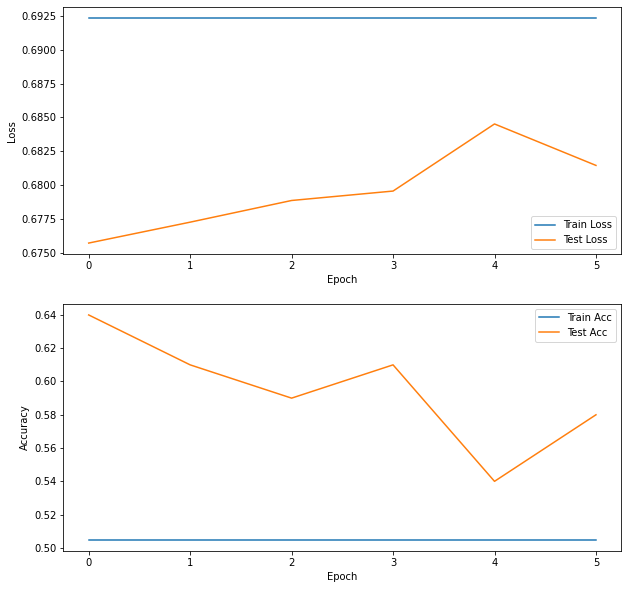

In [6]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 32)
        self.conv2 = GCNConv(32, 2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create the model and optimizer
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

# Train the model
train_loader = DataLoader(batch_data, batch_size=5, shuffle=True)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)

epochs = 100
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x.float(), data.edge_index)
        loss = F.nll_loss(out, data.y)
        train_loss += loss.item()
        train_acc += (out.argmax(dim=1) == data.y).sum().item() / data.num_nodes
        loss.backward()
        optimizer.step()
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

model.eval()
for data in test_loader:   
    # Evaluate the model on the test set

    with torch.no_grad():
        out = model(data.x.float(), data.edge_index)
        test_loss = F.nll_loss(out, data.y)
        test_acc = (out.argmax(dim=1) == data.y).sum().item() / data.num_nodes
        print(data.y)
        print(out.argmax(dim=1))

    print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

# Plot the model performance
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(test_losses, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(train_accs, label='Train Acc')
axs[1].plot(test_accs, label='Test Acc')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
plt.show()


_______________
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])
0.5
_______________
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0])
0.5
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])
tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])
0.525
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])
tensor([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])
0.45
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
tensor([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0])
0.5
_______________
tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])
tensor([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0])
0.5
_______________
tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])
tensor([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])
0.45
_______________
tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])
tensor([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])
0.5
_______________
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])
0.5
_______________
tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

tensor([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])
0.525
_______________
tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])
0.5
_______________
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])
tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])
0.375
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1,

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])
tensor([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])
0.525
_______________
tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])
tensor([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0])
0.525
_______________
tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])
0.5
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1,

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])
0.575
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])
tensor([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
0.5
_______________
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])
0.325
_______________
tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1,

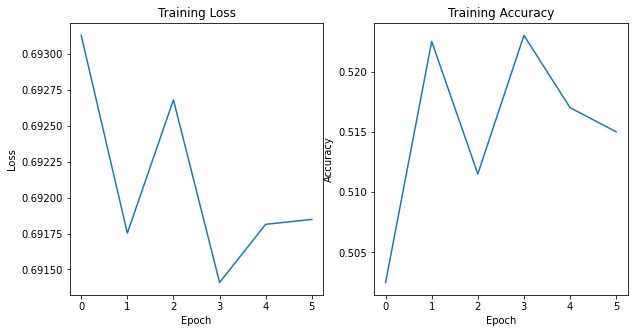

In [7]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
from sklearn.metrics import accuracy_score

# Define the model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GCN(input_dim=1, hidden_dim=16, output_dim=2)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Define the DataLoader
batch_size = 2
loader = DataLoader(batch_data, batch_size=batch_size, shuffle=True)

# Define the number of epochs
epochs = 6

# Train the model
train_loss = []
train_acc = []

for epoch in range(epochs):
    epoch_loss = 0.0
    epoch_acc = 0.0
    
    for data in loader:
        optimizer.zero_grad()
        out = model(data.x.float(), data.edge_index)
        loss = criterion(out, data.y)
        pred = out.argmax(dim=1)
        print("_______________")
        print(pred)
        print(data.y)
        acc = accuracy_score(pred.cpu(), data.y.cpu())
        print(acc)
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        loss.backward()
        optimizer.step()
    
    epoch_loss /= len(loader)
    epoch_acc /= len(loader)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Plot the model performance
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(train_acc)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
